Install Library

In [ ]:
!pip install transformers datasets accelerate -U fsspec==2025.3.2

INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6

Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile

file_path = "/content/drive/MyDrive/Indonesia AI - Project 2 : Text Summarization/liputan6_data.tar.gz"
extract_path = "/content/liputan6_data"

with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Done extracting.")

Done extracting.


In [ ]:
import os

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))

Streaming output truncated to the last 5000 lines.
/content/liputan6_data/liputan6_data/xtreme/dev/5535.json
/content/liputan6_data/liputan6_data/xtreme/dev/546.json
/content/liputan6_data/liputan6_data/xtreme/dev/9161.json
/content/liputan6_data/liputan6_data/xtreme/dev/5761.json
/content/liputan6_data/liputan6_data/xtreme/dev/2087.json
/content/liputan6_data/liputan6_data/xtreme/dev/11732.json
/content/liputan6_data/liputan6_data/xtreme/dev/3476.json
/content/liputan6_data/liputan6_data/xtreme/dev/3901.json
/content/liputan6_data/liputan6_data/xtreme/dev/7784.json
/content/liputan6_data/liputan6_data/xtreme/dev/11448.json
/content/liputan6_data/liputan6_data/xtreme/dev/948.json
/content/liputan6_data/liputan6_data/xtreme/dev/3228.json
/content/liputan6_data/liputan6_data/xtreme/dev/4267.json
/content/liputan6_data/liputan6_data/xtreme/dev/8091.json
/content/liputan6_data/liputan6_data/xtreme/dev/5210.json
/content/liputan6_data/liputan6_data/xtreme/dev/6160.json
/content/liputan6_dat

In [ ]:
base_path = "/content/liputan6_data/liputan6_data"

In [ ]:
train_files = "/content/liputan6_data/liputan6_data/canonical/train"
test_files = "/content/liputan6_data/liputan6_data/canonical/test"
dev_files = "/content/liputan6_data/liputan6_data/canonical/dev"

In [ ]:
import os
import json
import pandas as pd

# Path folder
train_dir = "/content/liputan6_data/liputan6_data/canonical/train"
dev_dir = "/content/liputan6_data/liputan6_data/canonical/dev"
test_dir = "/content/liputan6_data/liputan6_data/canonical/test"

def load_selected_fields(directory, split_name):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r') as file:
                    json_data = json.load(file)
                    data.append({
                        "id": json_data.get("id", ""),
                        "url": json_data.get("url", ""),
                        "clean_article": json.dumps(json_data.get("clean_article", []), ensure_ascii=False),
                        "clean_summary": json.dumps(json_data.get("clean_summary", []), ensure_ascii=False),
                        "extractive_summary": json.dumps(json_data.get("extractive_summary", []), ensure_ascii=False),
                        "split": split_name
                    })
            except Exception as e:
                print(f"Gagal membaca file: {file_path} - {e}")
    return data

# Load masing-masing data
train_data = load_selected_fields(train_dir, "train")
dev_data = load_selected_fields(dev_dir, "dev")
test_data = load_selected_fields(test_dir, "test")

# Simpan ke tiga file CSV terpisah
pd.DataFrame(train_data).to_csv("liputan6_train.csv", index=False)
pd.DataFrame(dev_data).to_csv("liputan6_dev.csv", index=False)
pd.DataFrame(test_data).to_csv("liputan6_test.csv", index=False)

print("CSV 'liputan6_train.csv', 'liputan6_dev.csv', dan 'liputan6_test.csv' berhasil dibuat.")

CSV 'liputan6_train.csv', 'liputan6_dev.csv', dan 'liputan6_test.csv' berhasil dibuat.


In [ ]:
import pandas as pd
data_train = pd.read_csv("liputan6_train.csv")
data_test = pd.read_csv("liputan6_test.csv")
data_dev = pd.read_csv("liputan6_dev.csv")

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  193883 non-null  int64 
 1   url                 193883 non-null  object
 2   clean_article       193883 non-null  object
 3   clean_summary       193883 non-null  object
 4   extractive_summary  193883 non-null  object
 5   split               193883 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.9+ MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
 5   split               10972 non-null  object
dtypes: int64(1), object(5)
memory usage: 514.4+ KB


In [ ]:
data_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
 5   split               10972 non-null  object
dtypes: int64(1), object(5)
memory usage: 514.4+ KB


Data Visualization

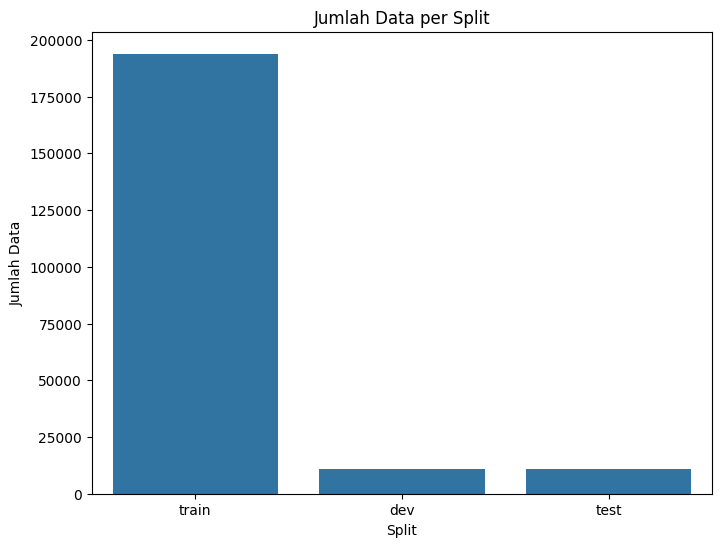

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the dataframes to easily count the number of rows per split
combined_df = pd.concat([data_train, data_dev, data_test])

# Count the number of rows for each split
split_counts = combined_df['split'].value_counts().reset_index()
split_counts.columns = ['split', 'count']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='split', y='count', data=split_counts)
plt.title('Jumlah Data per Split')
plt.xlabel('Split')
plt.ylabel('Jumlah Data')
plt.show()

Data Cleaning

In [ ]:
data_train2 = data_train.head(2000)
data_test2 = data_test.head(100)
data_dev2 = data_dev.head(100)

print("Informasi data_train_subset:")
data_train2.info()

print("\nInformasi data_test_subset:")
data_test2.info()

print("\nInformasi data_dev_subset:")
data_dev2.info()

Informasi data_train_subset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   int64 
 1   url                 2000 non-null   object
 2   clean_article       2000 non-null   object
 3   clean_summary       2000 non-null   object
 4   extractive_summary  2000 non-null   object
 5   split               2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB

Informasi data_test_subset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  100 non-null    int64 
 1   url                 100 non-null    object
 2   clean_article       100 non-null    object
 3   clean_summary       100 non-null    object
 4   extra

In [ ]:
data_train2 = data_train2.drop(columns=['id','url', 'extractive_summary', 'split'])
data_test2 = data_test2.drop(columns=['id','url', 'extractive_summary', 'split'])
data_dev2 = data_dev2.drop(columns=['id','url', 'extractive_summary', 'split'])

In [ ]:
import pandas as pd

# Gabungkan list of token menjadi string
data_train2['article'] = data_train2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_train2['summary'] = data_train2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))

data_test2['article'] = data_test2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_test2['summary'] = data_test2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))

data_dev2['article'] = data_dev2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_dev2['summary'] = data_dev2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))

In [ ]:
data_train2

,clean_article,clean_summary,article,summary
0,"[[""Liputan6"", ""."", ""com"", "","", ""Sukoharjo"", "":...","[[""Ibu"", ""rumah"", ""tangga"", ""di"", ""Sukoharjo"",...","Liputan6 . com , Sukoharjo : Ibu rumah tangga ...","Ibu rumah tangga di Sukoharjo , Jawa Tengah , ..."
1,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Ketua"", ""Umum"", ""DPP"", ""Partai"", ""Golkar"", ...","Liputan6 . com , Jakarta : Ketua Umum Dewan Pi...",Ketua Umum DPP Partai Golkar Jusuf Kalla tak m...
2,"[[""Selama"", ""dua"", ""musim"", ""terakhir"", "","", ""...","[[""Penampilan"", ""Alessandro"", ""Mancini"", ""bers...","Selama dua musim terakhir , Alessandro Mancini...",Penampilan Alessandro Mancini bersama AS Roma ...
3,"[[""Liputan6"", ""."", ""com"", "","", ""Ambon"", "":"", ""...","[[""Puluhan"", ""pendukung"", ""dua"", ""pasangan"", ""...","Liputan6 . com , Ambon : Ribut-ribut menjelang...",Puluhan pendukung dua pasangan calon bupati Ka...
4,"[[""Liputan6"", ""."", ""com"", "","", ""Madrid"", "":"", ...","[[""Kapten"", ""Spanyol"", ""dan"", ""kiper"", ""utama""...","Liputan6 . com , Madrid : Kapten Spanyol dan k...","Kapten Spanyol dan kiper utama Real Madrid , I..."
...,...,...,...,...
1995,"[[""Liputan6"", ""."", ""com"", "","", ""Birmingham"", ""...","[[""Gerbang"", ""transfer"", ""Gareth"", ""Barry"", ""k...","Liputan6 . com , Birmingham : Gareth Barry , 2...",Gerbang transfer Gareth Barry ke Manchester Ci...
1996,"[[""KABAR"", ""menggembirakan"", ""datang"", ""dari"",...","[[""KABAR"", ""menggembirakan"", ""datang"", ""dari"",...",KABAR menggembirakan datang dari Artis Peggy M...,KABAR menggembirakan datang dari Artis Peggy M...
1997,"[[""Liputan6"", ""."", ""com"", "","", ""Batam"", "":"", ""...","[[""Sekitar"", ""200"", ""penghuni"", ""LP"", ""Kelas"",...","Liputan6 . com , Batam : Gara-gara kebanjiran ...","Sekitar 200 penghuni LP Kelas IIA , Batam , Ke..."
1998,"[[""Polisi"", ""Menyita"", ""Senjata"", ""Api"", ""Ileg...","[[""Polda"", ""Semarang"", "","", ""Jawa"", ""Tenagah"",...",Polisi Menyita Senjata Api Ilegalbr / Liputan6...,"Polda Semarang , Jawa Tenagah , menyita senjat..."


In [ ]:
data_test2

,clean_article,clean_summary,article,summary
0,"[[""Liputan6"", ""."", ""com"", "","", ""Makassar"", "":""...","[[""Sekompi"", ""pasukan"", ""dari"", ""Poltabes"", ""M...","Liputan6 . com , Makassar : Satu kompi pasukan...",Sekompi pasukan dari Poltabes Makassar disiaga...
1,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Mantan"", ""Deputi"", ""Bulog"", ""Ahmad"", ""Ruska...","Liputan6 . com , Jakarta : Ahmad Ruskandar men...",Mantan Deputi Bulog Ahmad Ruskandar mengaku te...
2,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Sejumlah"", ""massa"", ""pendukung"", ""Gus"", ""Du...","Liputan6 . com , Jakarta : Hingga hari Jumat (...",Sejumlah massa pendukung Gus Dur yang berunjuk...
3,"[[""Liputan6"", ""."", ""com"", "","", ""Lhokseumawe"", ...","[[""Rosmiati"", "","", ""korban"", ""pengeboman"", ""pa...","Liputan6 . com , Lhokseumawe : Rosmiati hingga...","Rosmiati , korban pengeboman pada peringatan u..."
4,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Upaya"", ""kompromi"", ""politik"", ""yang"", ""dib...","Liputan6 . com , Jakarta : Perintah Presiden A...",Upaya kompromi politik yang dibangun Presiden ...
...,...,...,...,...
95,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Pemerintah"", ""menargetkan"", ""membuka"", ""lap...","Liputan6 . com , Jakarta : Pemerintah berusaha...",Pemerintah menargetkan membuka lapangan kerja ...
96,"[[""Liputan6"", ""."", ""com"", "","", ""Batam"", "":"", ""...","[[""Dua"", ""kakak"", ""beradik"", ""ditangkap"", ""kar...","Liputan6 . com , Batam : Petugas pendaftaran d...",Dua kakak beradik ditangkap karena berupaya me...
97,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Keluarga"", ""Sri"", ""Ngatini"", "","", ""tenaga"",...","Liputan6 . com , Jakarta : Keluarga Sri Ngatin...","Keluarga Sri Ngatini , tenaga kerja Indonesia ..."
98,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Mencuatnya"", ""sejumlah"", ""nama"", ""sebagai"",...","Liputan6 . com , Jakarta : Menjelang Sidang Is...",Mencuatnya sejumlah nama sebagai kandidat Wapr...


In [ ]:
data_dev2

,clean_article,clean_summary,article,summary
0,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Lantaran"", ""bukan"", ""sebagai"", ""wujud"", ""pe...","Liputan6 . com , Jakarta : Menteri Keuangan Pr...",Lantaran bukan sebagai wujud penyelesaian meny...
1,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Pemerintah"", ""tetap"", ""akan"", ""menjual"", ""o...","Liputan6 . com , Jakarta : Rencana pemerintah ...",Pemerintah tetap akan menjual obligasi gas Nat...
2,"[[""Liputan6"", ""."", ""com"", "","", ""Bandarlampung""...","[[""Untuk"", ""menghindari"", ""gejolak"", ""menjelan...","Liputan6 . com , Bandarlampung : Komisi D DPRD...",Untuk menghindari gejolak menjelang bulan puas...
3,"[[""Liputan6"", ""."", ""com"", "","", ""Mataram"", "":"",...","[[""Perseteruan"", ""warga"", ""Karang"", ""Genteng"",...","Liputan6 . com , Mataram : Tawuran antarwarga ...",Perseteruan warga Karang Genteng dengan warga ...
4,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Paulus"", ""Lei"", ""Tjie"", ""Cheng"", "","", ""seor...","Liputan6 . com , Jakarta : Paulus Lei Tjie Che...","Paulus Lei Tjie Cheng , seorang warga negara B..."
...,...,...,...,...
95,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Kejagung"", ""dan"", ""polisi"", ""pantang"", ""men...","Liputan6 . com , Jakarta : Tingkah laku Tommy ...",Kejagung dan polisi pantang menyerah melacak t...
96,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Empat"", ""areal"", ""pertokoan"", ""rata"", ""deng...","Liputan6 . com , Jakarta : Belasan pertokoan d...",Empat areal pertokoan rata dengan tanah setela...
97,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Sebanyak"", ""ratusan"", ""calon"", ""TKI"", ""beru...","Liputan6 . com , Jakarta : Lantaran ditipu bak...",Sebanyak ratusan calon TKI berunjuk rasa di de...
98,"[[""Liputan6"", ""."", ""com"", "","", ""Makassar"", "":""...","[[""Sekitar"", ""500"", ""kaleng"", ""oli"", ""palsu"", ...","Liputan6 . com , Makassar : Kepolisian Kota Be...",Sekitar 500 kaleng oli palsu dan puluhan drum ...


In [ ]:
data_train2 = data_train2.drop(columns=['clean_article', 'clean_summary'])
data_dev2 = data_dev2.drop(columns=['clean_article', 'clean_summary'])
data_test2 = data_test2.drop(columns=['clean_article', 'clean_summary'])

In [ ]:
data_train2

,article,summary
0,"Liputan6 . com , Sukoharjo : Ibu rumah tangga ...","Ibu rumah tangga di Sukoharjo , Jawa Tengah , ..."
1,"Liputan6 . com , Jakarta : Ketua Umum Dewan Pi...",Ketua Umum DPP Partai Golkar Jusuf Kalla tak m...
2,"Selama dua musim terakhir , Alessandro Mancini...",Penampilan Alessandro Mancini bersama AS Roma ...
3,"Liputan6 . com , Ambon : Ribut-ribut menjelang...",Puluhan pendukung dua pasangan calon bupati Ka...
4,"Liputan6 . com , Madrid : Kapten Spanyol dan k...","Kapten Spanyol dan kiper utama Real Madrid , I..."
...,...,...
1995,"Liputan6 . com , Birmingham : Gareth Barry , 2...",Gerbang transfer Gareth Barry ke Manchester Ci...
1996,KABAR menggembirakan datang dari Artis Peggy M...,KABAR menggembirakan datang dari Artis Peggy M...
1997,"Liputan6 . com , Batam : Gara-gara kebanjiran ...","Sekitar 200 penghuni LP Kelas IIA , Batam , Ke..."
1998,Polisi Menyita Senjata Api Ilegalbr / Liputan6...,"Polda Semarang , Jawa Tenagah , menyita senjat..."


In [ ]:
data_dev2

,article,summary
0,"Liputan6 . com , Jakarta : Menteri Keuangan Pr...",Lantaran bukan sebagai wujud penyelesaian meny...
1,"Liputan6 . com , Jakarta : Rencana pemerintah ...",Pemerintah tetap akan menjual obligasi gas Nat...
2,"Liputan6 . com , Bandarlampung : Komisi D DPRD...",Untuk menghindari gejolak menjelang bulan puas...
3,"Liputan6 . com , Mataram : Tawuran antarwarga ...",Perseteruan warga Karang Genteng dengan warga ...
4,"Liputan6 . com , Jakarta : Paulus Lei Tjie Che...","Paulus Lei Tjie Cheng , seorang warga negara B..."
...,...,...
95,"Liputan6 . com , Jakarta : Tingkah laku Tommy ...",Kejagung dan polisi pantang menyerah melacak t...
96,"Liputan6 . com , Jakarta : Belasan pertokoan d...",Empat areal pertokoan rata dengan tanah setela...
97,"Liputan6 . com , Jakarta : Lantaran ditipu bak...",Sebanyak ratusan calon TKI berunjuk rasa di de...
98,"Liputan6 . com , Makassar : Kepolisian Kota Be...",Sekitar 500 kaleng oli palsu dan puluhan drum ...


In [ ]:
data_test2

,article,summary
0,"Liputan6 . com , Makassar : Satu kompi pasukan...",Sekompi pasukan dari Poltabes Makassar disiaga...
1,"Liputan6 . com , Jakarta : Ahmad Ruskandar men...",Mantan Deputi Bulog Ahmad Ruskandar mengaku te...
2,"Liputan6 . com , Jakarta : Hingga hari Jumat (...",Sejumlah massa pendukung Gus Dur yang berunjuk...
3,"Liputan6 . com , Lhokseumawe : Rosmiati hingga...","Rosmiati , korban pengeboman pada peringatan u..."
4,"Liputan6 . com , Jakarta : Perintah Presiden A...",Upaya kompromi politik yang dibangun Presiden ...
...,...,...
95,"Liputan6 . com , Jakarta : Pemerintah berusaha...",Pemerintah menargetkan membuka lapangan kerja ...
96,"Liputan6 . com , Batam : Petugas pendaftaran d...",Dua kakak beradik ditangkap karena berupaya me...
97,"Liputan6 . com , Jakarta : Keluarga Sri Ngatin...","Keluarga Sri Ngatini , tenaga kerja Indonesia ..."
98,"Liputan6 . com , Jakarta : Menjelang Sidang Is...",Mencuatnya sejumlah nama sebagai kandidat Wapr...


Data Preprocessing

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(data_train2[['article', 'summary']])
val_dataset = Dataset.from_pandas(data_dev2[['article', 'summary']])
test_dataset = Dataset.from_pandas(data_test2[['article', 'summary']])

In [ ]:
train_dataset

Dataset({
    features: ['article', 'summary'],
    num_rows: 2000
})

In [ ]:
#Load BART Model & Tokenization
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments

model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
# Preprocess the data
def preprocess_function(examples):
    inputs = [doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding="max_length")

    # Setup the tokenizer for targets
    labels = tokenizer(text_target=examples["summary"], max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val = val_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Data Training

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./bart_finetuned",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,  # Reduced batch size
    per_device_eval_batch_size=2,   # Reduced batch size
    num_train_epochs=3,  # Reduced epochs for faster execution
    weight_decay=0.01,
    save_total_limit=2,
    fp16=True, # Enable mixed precision training if GPU supports it
    report_to="none", # Disable reporting for simplicity
    logging_dir="./logs",
    logging_steps=10,
    eval_steps=100,
    save_steps=100,
)

In [ ]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
)

/tmp/ipython-input-28-697945753.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Train the model
trainer.train()

print("Training complete.")

Epoch,Training Loss,Validation Loss
1,0.769000,0.725764
2,0.645400,0.685539
3,0.512800,0.687328


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3465: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Training complete.


Model Evaluation

In [ ]:
# Evaluate the model
results = trainer.evaluate(tokenized_test)
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.5797329545021057, 'eval_runtime': 4.2518, 'eval_samples_per_second': 23.52, 'eval_steps_per_second': 11.76, 'epoch': 3.0}


In [ ]:
# BERTScore Calucalation

!pip install bert-score

from bert_score import score
import torch # Import torch here

# Generate summaries from the test set
test_articles = data_test2['article'].tolist()

# Generate summaries for the entire test set
generated_summaries = []
for i in range(0, len(test_articles), training_args.per_device_eval_batch_size):
    batch_articles = test_articles[i : i + training_args.per_device_eval_batch_size]
    inputs = tokenizer(batch_articles, max_length=1024, truncation=True, return_tensors="pt", padding=True).to(model.device)
    with torch.no_grad():
        # Generate summaries (might need to adjust parameters like num_beams)
        outputs = model.generate(**inputs, max_length=128, num_beams=4, early_stopping=True)
    batch_summaries = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in outputs]
    generated_summaries.extend(batch_summaries)


# The true summaries from test dataset
reference_summaries = data_test2['summary'].tolist()

# Calculate BERTScore
# Using 'bert-base-uncased' as the default model, but can specify a different one
# lang='en' is for English, change if language is different
P, R, F1 = score(generated_summaries, reference_summaries, lang='id', verbose=True)

print(f"BERTScore Precision: {P.mean():.4f}")
print(f"BERTScore Recall: {R.mean():.4f}")
print(f"BERTScore F1 Score: {F1.mean():.4f}")

calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 0.55 seconds, 181.46 sentences/sec
BERTScore Precision: 0.7520
BERTScore Recall: 0.8092
BERTScore F1 Score: 0.7791


Make Predict Model

In [ ]:
import torch

def predict_summary(article_text, model, tokenizer, max_length=128, num_beams=4):
    """
    Generates a summary for a given article text using the trained BART model.

    Args:
        article_text (str): The input article text to summarize.
        model (BartForConditionalGeneration): The trained BART model.
        tokenizer (BartTokenizer): The BART tokenizer.
        max_length (int): The maximum length of the generated summary.
        num_beams (int): The number of beams for beam search generation.

    Returns:
        str: The generated summary.
    """
    # Tokenize the input article
    inputs = tokenizer(article_text, max_length=1024, truncation=True, return_tensors="pt", padding=True)

    # Move inputs to the same device as the model
    inputs = {name: tensor.to(model.device) for name, tensor in inputs.items()}

    # Generate the summary
    with torch.no_grad():
        summary_ids = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=True,
        )

    # Decode the generated summary
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

    return summary_text

# Example usage:
example_article = "Alan Turing adalah seorang matematikawan, logikawan, kriptanalis, dan ilmuwan komputer asal Inggris yang dianggap sebagai salah satu tokoh paling berpengaruh dalam sejarah ilmu komputer dan kecerdasan buatan. Lahir pada 23 Juni 1912 di Maida Vale, London, Turing menunjukkan kecerdasan luar biasa sejak usia dini. Ia belajar di King's College, Universitas Cambridge, dan kemudian melanjutkan studinya di Universitas Princeton di Amerika Serikat, di mana ia mendalami logika matematika. Salah satu pencapaian paling terkenal Turing adalah konsep Mesin Turing, sebuah model teoritis tentang komputasi yang mampu memecahkan berbagai jenis perhitungan. Mesin Turing menjadi dasar bagi pengembangan komputer modern dan membantu mendefinisikan batasan dari apa yang dapat dihitung secara algoritmik. Dalam makalahnya yang terkenal tahun 1936 berjudul On Computable Numbers, with an Application to the Entscheidungsproblem, Turing menjelaskan bagaimana suatu mesin abstrak dapat digunakan untuk menyelesaikan masalah matematika dengan mengikuti serangkaian instruksi. Namun kontribusi Turing tidak berhenti di bidang teori. Selama Perang Dunia II, ia bekerja di Bletchley Park, pusat kode dan kriptanalisis militer Inggris. Di sana, ia memainkan peran kunci dalam memecahkan kode Enigma, mesin sandi yang digunakan oleh militer Jerman Nazi untuk mengamankan komunikasi mereka. Dengan merancang mesin elektromechanical yang disebut Bombe, Turing dan timnya berhasil menguraikan pesan-pesan rahasia, yang diperkirakan memperpendek perang selama beberapa tahun dan menyelamatkan jutaan nyawa. Meskipun jasanya sangat besar, kehidupan pribadi Turing tragis. Pada tahun 1952, ia dihukum karena homoseksualitas, yang pada waktu itu masih dianggap sebagai tindak pidana di Inggris. Sebagai hukuman, ia diberi pilihan antara penjara atau pengobatan hormonal yang menyebabkan efek samping fisik dan mental yang parah. Turing memilih pengobatan tersebut, tetapi penderitaan yang ia alami setelahnya sangat berat. Alan Turing meninggal pada 7 Juni 1954, dalam usia 41 tahun. Ia ditemukan meninggal karena keracunan sianida dalam sebuah insiden yang kemudian dianggap sebagai bunuh diri, meskipun beberapa teori alternatif juga sempat dikemukakan. Setelah kematiannya, banyak pihak mulai menyadari besarnya kontribusi Turing terhadap ilmu pengetahuan dan teknologi. Pada tahun 2009, pemerintah Inggris secara resmi menyampaikan permintaan maaf atas perlakuan terhadap Turing, dan pada tahun 2013, ia diberi pengampunan kerajaan secara anumerta oleh Ratu Elizabeth II. Hari ini, warisan Alan Turing dikenang di seluruh dunia. Namanya diabadikan dalam Turing Award, penghargaan tertinggi dalam bidang ilmu komputer, yang setara dengan Hadiah Nobel. Pemikirannya tentang mesin dan kecerdasan buatan menjadi pondasi bagi perkembangan teknologi yang kini menjadi bagian dari kehidupan sehari-hari. Turing tidak hanya dikenang sebagai pelopor komputer modern, tetapi juga sebagai simbol perjuangan terhadap diskriminasi dan ketidakadilan."

# Ensure the model and tokenizer are loaded from the previous training steps
# model and tokenizer should be available in the notebook's scope from the previous code

# Generate the summary
generated_summary = predict_summary(example_article, model, tokenizer)

print("Original Article:")
print(example_article)
print("\nGenerated Summary:")
generated_summary

Original Article:
Alan Turing adalah seorang matematikawan, logikawan, kriptanalis, dan ilmuwan komputer asal Inggris yang dianggap sebagai salah satu tokoh paling berpengaruh dalam sejarah ilmu komputer dan kecerdasan buatan. Lahir pada 23 Juni 1912 di Maida Vale, London, Turing menunjukkan kecerdasan luar biasa sejak usia dini. Ia belajar di King's College, Universitas Cambridge, dan kemudian melanjutkan studinya di Universitas Princeton di Amerika Serikat, di mana ia mendalami logika matematika. Salah satu pencapaian paling terkenal Turing adalah konsep Mesin Turing, sebuah model teoritis tentang komputasi yang mampu memecahkan berbagai jenis perhitungan. Mesin Turing menjadi dasar bagi pengembangan komputer modern dan membantu mendefinisikan batasan dari apa yang dapat dihitung secara algoritmik. Dalam makalahnya yang terkenal tahun 1936 berjudul On Computable Numbers, with an Application to the Entscheidungsproblem, Turing menjelaskan bagaimana suatu mesin abstrak dapat digunakan 

'Mesin Turing menjadi dasar bagi pengembangan komputer modern dan membantu mendefinisikan batasan dari apa yang dapat dihitung secara algoritmik di Bletchley Park .'

In [ ]:
# Generate the summary
generated_summary = predict_summary(example_article, model, tokenizer)

print("Original Article:")
print(example_article)
print("\nGenerated Summary:")
print(generated_summary)

# Save the fine-tuned model and tokenizer
model.save_pretrained("./bart_finetuned_model")
tokenizer.save_pretrained("./bart_finetuned_tokenizer")

print("Model and tokenizer saved.")

Original Article:
Alan Turing adalah seorang matematikawan, logikawan, kriptanalis, dan ilmuwan komputer asal Inggris yang dianggap sebagai salah satu tokoh paling berpengaruh dalam sejarah ilmu komputer dan kecerdasan buatan. Lahir pada 23 Juni 1912 di Maida Vale, London, Turing menunjukkan kecerdasan luar biasa sejak usia dini. Ia belajar di King's College, Universitas Cambridge, dan kemudian melanjutkan studinya di Universitas Princeton di Amerika Serikat, di mana ia mendalami logika matematika. Salah satu pencapaian paling terkenal Turing adalah konsep Mesin Turing, sebuah model teoritis tentang komputasi yang mampu memecahkan berbagai jenis perhitungan. Mesin Turing menjadi dasar bagi pengembangan komputer modern dan membantu mendefinisikan batasan dari apa yang dapat dihitung secara algoritmik. Dalam makalahnya yang terkenal tahun 1936 berjudul On Computable Numbers, with an Application to the Entscheidungsproblem, Turing menjelaskan bagaimana suatu mesin abstrak dapat digunakan 

Score Visualization


--- Evaluation Metrics ---
Evaluation Loss: 0.5797329545021057

--- BERTScore Metrics ---
BERTScore Precision: 0.7520
BERTScore Recall: 0.8092
BERTScore F1 Score: 0.7791


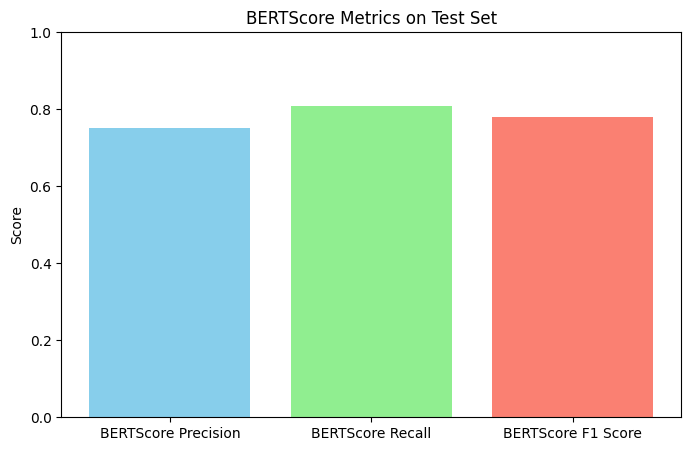

In [ ]:
# Assuming `results` contains the evaluation metrics like loss
# and `P`, `R`, `F1` contain the BERTScore metrics.
print("\n--- Evaluation Metrics ---")
print("Evaluation Loss:", results.get('eval_loss')) # Access eval_loss from the dictionary

print("\n--- BERTScore Metrics ---")
print(f"BERTScore Precision: {P.mean():.4f}")
print(f"BERTScore Recall: {R.mean():.4f}")
print(f"BERTScore F1 Score: {F1.mean():.4f}")

# For visualization
import matplotlib.pyplot as plt
import numpy as np

# 3 BERTScore metrics
metric_names = ['BERTScore Precision', 'BERTScore Recall', 'BERTScore F1 Score']
metric_values = [P.mean().item(), R.mean().item(), F1.mean().item()] # .item() to get Python scalar

plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Score')
plt.title('BERTScore Metrics on Test Set')
plt.ylim(0, 1) # Scores are typically between 0 and 1
plt.show()

# You could also visualize the training loss if you logged it in the training arguments
# and had access to the training logs. The Trainer typically saves logs in the output directory.
# You would need to parse the log file to get the loss over steps/epochs.
# For example, if your logs are in `./logs/runs/some_run_id/events.out.tfevents...`
# You might need to use tensorboard to view them interactively or parse the file.

# Example of plotting hypothetical training loss (requires parsing logs)
# This is illustrative and assumes you have extracted loss values.
# If you need to parse logs, you'd need additional code.
# Let's assume you have a list of steps and corresponding loss values:
# steps = [10, 20, 30, ...]
# train_losses = [0.5, 0.45, 0.4, ...]

# # If you had log data:
# plt.figure(figsize=(10, 6))
# plt.plot(steps, train_losses, label='Training Loss')
# # If you also logged evaluation loss during training:
# # plt.plot(eval_steps, eval_losses, label='Validation Loss')
# plt.xlabel('Training Steps')
# plt.ylabel('Loss')
# plt.title('Training Loss over Steps')
# plt.legend()
# plt.grid(True)
# plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e354464a7175db130823fbc9c6fce8db3b6faa58373253b67ca6e5480b7b692e
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score

--- ROUGE Scores ---
ROUGE-1 F-measure: 0.3954
ROUGE-2 F-measure: 0.2495
ROUGE-L F-measure: 0.3421


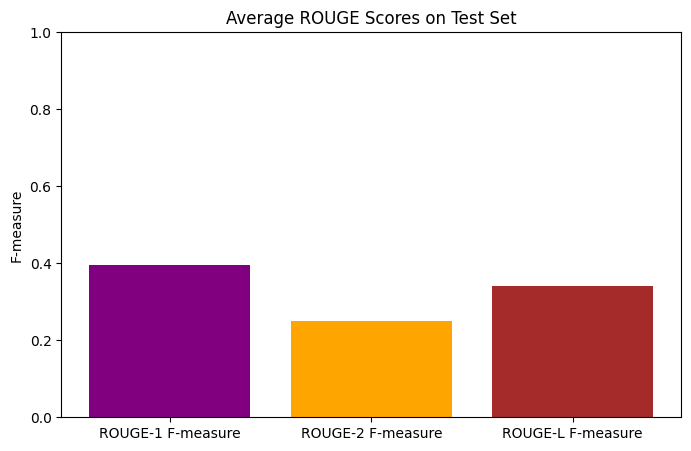

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install rouge_score
from rouge_score import rouge_scorer

# Calculate ROUGE score
# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate scores for each generated summary against its reference
rouge_scores = []
for gen, ref in zip(generated_summaries, reference_summaries):
    scores = scorer.score(ref, gen)
    rouge_scores.append(scores)

# To get the average scores across the dataset
rouge1_fmeasure = np.mean([score['rouge1'].fmeasure for score in rouge_scores])
rouge2_fmeasure = np.mean([score['rouge2'].fmeasure for score in rouge_scores])
rougeL_fmeasure = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

print("\n--- ROUGE Scores ---")
print(f"ROUGE-1 F-measure: {rouge1_fmeasure:.4f}")
print(f"ROUGE-2 F-measure: {rouge2_fmeasure:.4f}")
print(f"ROUGE-L F-measure: {rougeL_fmeasure:.4f}")

# Optional: Visualize ROUGE scores
rouge_metric_names = ['ROUGE-1 F-measure', 'ROUGE-2 F-measure', 'ROUGE-L F-measure']
rouge_metric_values = [rouge1_fmeasure, rouge2_fmeasure, rougeL_fmeasure]

plt.figure(figsize=(8, 5))
plt.bar(rouge_metric_names, rouge_metric_values, color=['purple', 'orange', 'brown'])
plt.ylabel('F-measure')
plt.title('Average ROUGE Scores on Test Set')
plt.ylim(0, 1)
plt.show()

In [ ]:
!pip install -q gradio

import gradio as gr

def summarize_article(article):
    """
    Gradio interface function to generate a summary for a given article text.
    """
    if not article:
        return "Please provide an article to summarize."
    return predict_summary(article, model, tokenizer)

# Assuming model and tokenizer are loaded and available from previous steps
# The predict_summary function should also be defined above

iface = gr.Interface(
    fn=summarize_article,
    inputs=gr.Textbox(lines=10, label="Enter Article Here"),
    outputs=gr.Textbox(label="Generated Summary"),
    title="Text Summarization using BART",
    description="Enter an article and get a generated summary.",
    live=True, # Optional: Enable live updates as you type
)

# Launch the Gradio interface
# Share=True will create a public link (valid for 72 hours)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82077b9fa6bd048c93.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
